### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

$$ \frac{\partial{loss}}{\partial{k}} = -x/{n} ,\frac{\partial{loss}}{\partial{b}} = -1/n;y<y_hat$$

$$ \frac{\partial{loss}}{\partial{k}} = x/n ,\frac{\partial{loss}}{\partial{b}} = 1/n;y>=y_hat$$

In [18]:
from sklearn.datasets import load_boston
import random

In [19]:
data = load_boston()

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

In [21]:
X,y= data['data'],data['target']

In [22]:
%matplotlib inline

In [23]:
def price(rm,k,b):
    return k*rm + b
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

In [51]:
def loss(y,y_hat):
    
    return sum(y_i - y_hat_i for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [90]:
def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += x_i
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>=y_hat_i:
            return 1/n*gradient
        if y_i<y_hat_i:
            return -1/n*gradient 
def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += 1
        
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>=y_hat_i:
            return 1/n*gradient
        if y_i<y_hat_i:
            return -1/n*gradient

23 67
189.01378458498013When time is : 0,Get best_k:23 best_b: 67,and the loss is 189.01378458498013
189.4187508788071When time is : 1,Get best_k:23.062846343873517 best_b: 67.01,and the loss is 189.01378458498013
189.8237171726341When time is : 2,Get best_k:23.125692687747033 best_b: 67.02000000000001,and the loss is 189.01378458498013
190.22868346646058When time is : 3,Get best_k:23.18853903162055 best_b: 67.03000000000002,and the loss is 189.01378458498013
190.63364976028754When time is : 4,Get best_k:23.251385375494067 best_b: 67.04000000000002,and the loss is 189.01378458498013
191.0386160541147When time is : 5,Get best_k:23.314231719367584 best_b: 67.05000000000003,and the loss is 189.01378458498013
191.44358234794154When time is : 6,Get best_k:23.3770780632411 best_b: 67.06000000000003,and the loss is 189.01378458498013
191.84854864176802When time is : 7,Get best_k:23.439924407114617 best_b: 67.07000000000004,and the loss is 189.01378458498013
192.25351493559512When time is : 8,

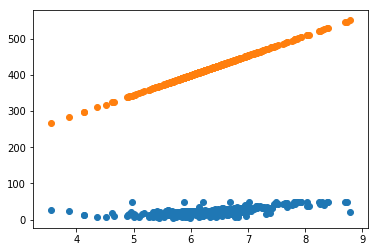

In [107]:
X_rm = X[:,5]
trying_times = 500
min_loss = float('inf')
current_k = random.randint(10,100)
current_b = random.randint(10,100)
print(current_k,current_b)
learning_rate = 0.01
update_time = 0
for i in range(trying_times):
    
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    
    current_loss = abs(loss(y,price_by_k_and_b))
    
    if current_loss < min_loss:
        min_loss = current_loss
        
    print('{}When time is : {},Get best_k:{} best_b: {},and the loss is {}'.format(current_loss,i,current_k,current_b,min_loss))
    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    
    b_gradient = partial_b(X_rm,y,price_by_k_and_b)
    current_k = current_k +(-1*k_gradient)*learning_rate
    current_b = current_b +(-1*b_gradient)*learning_rate
    
#print('Get best_k:{} best_b: {},and the loss is {}'.format(best_k,best_b,min_loss))
price_by_k_and_b_best = [price(r, current_k, current_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_k_and_b_best)

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [146]:
from functools import lru_cache#不缺solution啊
solution = {}
zong = []

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1),),  # string 1 delete tail
        
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2),),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '',)
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2),)
    print(string2)
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [147]:
edit_distance('ABE', 'C2EF')

C
C2
C2E
C2EF
C
C2
C2E
C2EF
C
C2
C2E
C2EF


3

In [137]:
#不会把最优的修改写出来

{('A', 'C'): 'SUB A => C',
 ('A', 'C2'): 'ADD 2',
 ('A', 'C2E'): 'ADD E',
 ('A', 'C2EF'): 'ADD F'}

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:利用导数和梯度可以计算拟合函数与实际函数之间的差值变化趋势，知道拟合函数应该的变化方向并向其变化，进而减少拟合时间，增加拟合准确度。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度，表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。
下降，求解损失函数最小值时一步步的迭代求解，得到最小化的损失函数和模型参数值，以此递归性地逼近最小偏差模型。


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:之前的模型误差函数的变化趋势无法计算只能尝试，对了就继续，不对就换，需要很大的计算时间和空间，梯度下降可以计算出误差函数的变化趋势，从而一步步修正拟合函数。

4. Using the simple words to describe: What's the machine leanring.¶

Ans:在大量的现象，数据，经验中统计出其规律，函数。从而建立概率统计模型数据函数来预测数据。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

In [ ]:
动态规划可以分析一个问题最优解，得到所有的情况找最优解。搜索是每一个都找，一步一步找下去，但可能有重复的，动态不会，只招一遍就记录下来。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

In [ ]:
ANS：感觉机器学习也可以训练出来，但关键训练需要费时费空间，如果一个问题可以通过动态规划解决，说明不太复杂，没有必要机器学习。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
ANS：下棋，找零钱最优拆分，编辑距离

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
ANS：变换字符串，不同字符串的相似度，基于此的防止重复发帖之类

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

In [ ]:
ANS：问题的阶段：只有问题划分的每一个阶段是有序的才可以用动态规划
每个阶段的状态：各种客观情况写成不同的状态
从前一个阶段转化到后一个阶段之间的递推关系：通过上一阶段状态导出本阶段的状态，写出函数

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

In [ ]:
ANS:以经算过的数找到的点会记录下来，减少运算时间和空间